# Figures for publication
This script will reproduce plots used in the publication

In [1]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
 
# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

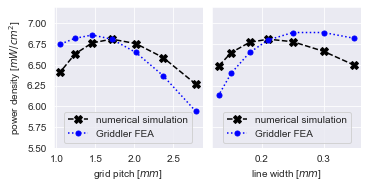

In [11]:
# Optimum wobble: Does the optimum H-bar design identified by gridgraph_numeric also
# correspond to the optimum in Griddler?
# Center point: Rsheet 1000; Pwire 1e-6; Radius 5 cm; Jsol 20 mA/cm2; Voc 0.8V; h_wire 5e-4 cm; pitch_min 1 mm; w_min 1e-4 cm
DIR = '../experiments/results'
FILE = 'optimum_wobble.xls'
YLIM = [5.5, 7.2]

sns.set_style('darkgrid')
df = pd.read_excel(os.path.join(DIR, FILE))

knockdown = df['Griddler W/cm2'].iloc[0] / df['W/cm2'].iloc[0]

fig, axs = plt.subplots(1, 2, figsize=(5, 2.5), constrained_layout=True, sharey=True)

# Plot sensitivity to Pitch
idxs = np.arange(1, 8)
x = df['pitch'].iloc[idxs] * 10  # cm to mm
y1 = df['W/cm2'].iloc[idxs] * knockdown * 1e3  # scale to match center point
y2 = df['Griddler W/cm2'].iloc[idxs] * 1e3
axs[0].plot(x, y1, marker='X', markersize=8,
            ls='--', color='black')
axs[0].plot(x, y2, marker='o', markersize=5,
            ls=':', color='blue')
axs[0].set_ylim(YLIM)
axs[0].legend(('numerical simulation', 'Griddler FEA'), loc='lower center')

axs[0].set_xlabel('grid pitch [$mm$]')
axs[0].set_ylabel('power density [$mW/cm^2$]')


# Plot sensitivity to Width
idxs = np.arange(8, 15)
x = df['width'].iloc[idxs] * 10
y1 = df['W/cm2'].iloc[idxs] * knockdown * 1e3
y2 = df['Griddler W/cm2'].iloc[idxs] * 1e3
axs[1].plot(x, y1, marker='X', markersize=8,
            ls='--', color='black')
axs[1].plot(x, y2, marker='o', markersize=5,
            ls=':', color='blue')
axs[1].set_ylim(YLIM)
axs[1].legend(('numerical simulation', 'Griddler FEA'), loc='lower center')

axs[1].set_xlabel('line width [$mm$]')

# fig.suptitle('5cm solar cell power with an H-bar grid design')

plt.savefig(os.path.join(DIR, 'wobble_fig_cor_' + str(knockdown) + '.png'), dpi=400)

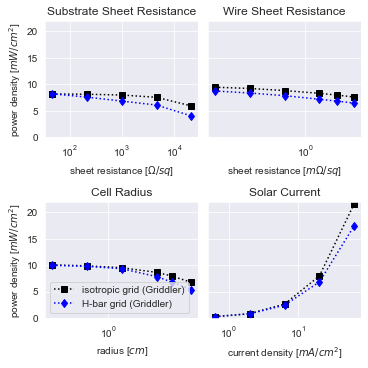

In [14]:
# Comparison: Under what conditions do isotropic grids outperform H-bar?
# Center point: Rsheet 1000; Pwire 1e-6; Radius 5 cm; Jsol 20 mA/cm2; Voc 0.8V; h_wire 5e-4 cm; pitch_min 1 mm; w_min 1e-4 cm
FILE = 'results.xls'
YLIM = [0, 22]
JUST_GRDLR = True

sns.set_style('darkgrid')
df = pd.read_excel(os.path.join(DIR, FILE))

griddler_H_column = 'Griddler Hbar W/cm2'
griddler_iso_column = 'Griddler Iso W/cm2'


knockdown_H = df[griddler_H_column].iloc[0] / df['H-Bar W/cm2'].iloc[0]
knockdown_iso = df[griddler_iso_column].iloc[0] / df['Isotropic W/cm2'].iloc[0]

knockdown_H = np.mean((knockdown_H, knockdown_iso))
knockdown_iso = knockdown_H

fig, axs = plt.subplots(2, 2, figsize=(5, 5), constrained_layout=True, sharey=True)

# Plot grid comparison over Rsheet
idxs = np.arange(1, 6)
x = df['Rsheet'].iloc[idxs]  # Ohms/sq
iso = df['Isotropic W/cm2'].iloc[idxs] * knockdown_iso * 1e3  # scale to match center point
hbar = df['H-Bar W/cm2'].iloc[idxs] * knockdown_H * 1e3
iso_val = df[griddler_iso_column].iloc[idxs] * 1e3
hbar_val = df[griddler_H_column].iloc[idxs] * 1e3
if not JUST_GRDLR:
    axs[0][0].semilogx(x, iso, marker='x', markersize=6,
                ls='--', color='black')
axs[0][0].semilogx(x, iso_val, marker='s', markersize=6,
            ls=':', color='black')
if not JUST_GRDLR:
    axs[0][0].semilogx(x, hbar, marker='+', markersize=6,
                ls='--', color='blue')
axs[0][0].semilogx(x, hbar_val, marker='d', markersize=6,
            ls=':', color='blue')

axs[0][0].set_ylim(YLIM)

axs[0][0].set_xlabel('sheet resistance [$\Omega/sq$]')
axs[0][0].set_ylabel('power density [$mW/cm^2$]')
axs[0][0].set_title('Substrate Sheet Resistance')


# Plot grid comparison over Rwire
idxs = np.arange(6, 12)
x = df['Rwire'].iloc[idxs] * 1e3 # mOhms/sq
iso = df['Isotropic W/cm2'].iloc[idxs] * knockdown_iso * 1e3  # scale to match center point
hbar = df['H-Bar W/cm2'].iloc[idxs] * knockdown_H * 1e3
iso_val = df[griddler_iso_column].iloc[idxs] * 1e3
hbar_val = df[griddler_H_column].iloc[idxs] * 1e3
if not JUST_GRDLR:
    axs[0][1].semilogx(x, iso, marker='x', markersize=6,
                ls='--', color='black')
axs[0][1].semilogx(x, iso_val, marker='s', markersize=6,
            ls=':', color='black')
if not JUST_GRDLR:
    axs[0][1].semilogx(x, hbar, marker='+', markersize=6,
                ls='--', color='blue')
axs[0][1].semilogx(x, hbar_val, marker='d', markersize=6,
            ls=':', color='blue')

axs[0][1].set_xlabel('sheet resistance [$m\Omega/sq$]')
axs[0][1].set_title('Wire Sheet Resistance')


# Plot grid comparison over Radius
idxs = np.arange(12, 18)
x = df['R'].iloc[idxs]  # cm
iso = df['Isotropic W/cm2'].iloc[idxs] * knockdown_iso * 1e3  # scale to match center point
hbar = df['H-Bar W/cm2'].iloc[idxs] * knockdown_H * 1e3
iso_val = df[griddler_iso_column].iloc[idxs] * 1e3
hbar_val = df[griddler_H_column].iloc[idxs] * 1e3
if not JUST_GRDLR:
    axs[1][0].semilogx(x, iso, marker='x', markersize=6,
                ls='--', color='black')
axs[1][0].semilogx(x, iso_val, marker='s', markersize=6,
            ls=':', color='black')
if not JUST_GRDLR:
    axs[1][0].semilogx(x, hbar, marker='+', markersize=6,
                ls='--', color='blue')
axs[1][0].semilogx(x, hbar_val, marker='d', markersize=6,
            ls=':', color='blue')
if JUST_GRDLR:
    axs[1][0].legend(('isotropic grid (Griddler)', 'H-bar grid (Griddler)'), loc='lower left')
else:
    axs[1][0].legend(('isotropic grid', 'isotropic validation', 'H-bar grid', 'H-bar validation'), loc='lower left')

axs[1][0].set_xlabel('radius [$cm$]')
axs[1][0].set_ylabel('power density [$mW/cm^2$]')
axs[1][0].set_title('Cell Radius')


# Plot grid comparison over Jsol
idxs = np.arange(18, 23)
x = df['Jsol'].iloc[idxs] * 1e3 # mA/cm2
iso = df['Isotropic W/cm2'].iloc[idxs] * knockdown_iso * 1e3  # scale to match center point
hbar = df['H-Bar W/cm2'].iloc[idxs] * knockdown_H * 1e3
iso_val = df[griddler_iso_column].iloc[idxs] * 1e3
hbar_val = df[griddler_H_column].iloc[idxs] * 1e3
if not JUST_GRDLR:
    axs[1][1].semilogx(x, iso, marker='x', markersize=6,
                ls='--', color='black')
axs[1][1].semilogx(x, iso_val, marker='s', markersize=6,
            ls=':', color='black')
if not JUST_GRDLR:
    axs[1][1].semilogx(x, hbar, marker='+', markersize=6,
                ls='--', color='blue')
axs[1][1].semilogx(x, hbar_val, marker='d', markersize=6,
            ls=':', color='blue')

axs[1][1].set_xlabel('current density [$mA/cm^2$]')
axs[1][1].set_title('Solar Current')



#fig.suptitle('H-bar vs Isotropic grid power')

plt.savefig(os.path.join(DIR, 'HvsIso_fig_cor_' + str(knockdown_H) + '.png'), dpi=400)